<a href="https://colab.research.google.com/github/jocelynandrade18/Repositorio2.-/blob/main/Clasificaci%C3%B3n_de_Candidatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación de Candidatos**

In [15]:
import numpy as np # Importa Numpy
import pandas as pd # Importa Pandas

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100 # segmentar por habilidades matemáticas tecnologicas
tec = np.random.randint(70, 101, (n_muestras, 6)) # Toma del numpy numero aleatorio entero entre 70 y 100, filas y columnas
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6)) #Mide la cantidad de muestras 6
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6)) # 6 habilidades tecnicas, matematicas y psicologicas
# Nombres de columnas
columnas = [ # queremos clasificar las columnas por nombre para ver cual de ellas sabe
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame #Generar un DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas) # Concantena las columnas de tec, mat, psi, y las columnas

In [16]:
df # Estructura del DataFrame

,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,71,91,74,81,78,80,71,89,74,74,71,72,62,52,52,67,69,66
1,94,83,100,72,81,97,88,88,61,85,84,83,51,79,54,57,73,63
2,79,80,94,71,78,87,85,83,77,66,69,66,73,80,80,55,85,63
3,82,90,80,94,87,82,62,64,66,76,89,65,61,54,65,50,79,58
4,91,70,91,89,74,73,82,85,73,63,61,83,84,54,51,60,76,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,88,77,78,96,74,86,85,80,70,82,63,66,71,84,53,60,72,84
4996,99,98,89,91,82,94,67,83,86,88,69,89,61,85,52,73,57,62
4997,85,97,77,91,70,97,71,88,74,84,83,84,83,51,71,71,61,74
4998,81,73,87,87,83,76,72,70,86,61,71,74,80,57,59,85,63,82


obtenemos la etiqueta y

In [17]:
# Calcular promedio por grupo y promedio total #promediar las habilidades y decir si es apto para el trabajo
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1) # Usamos pandas, escoger las habilidades tecnologicas axis 1 es por columna
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1) # Promediamos todo lo que tiene que ver con matemáticas
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1) #Promediamos todo lo que tiene que ver con psicología
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3 # Realizamos el promedio de las 3 categorías
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int) #designamos valores, mayor a 75
# one-hot encoding
y = pd.get_dummies(y).values # prepara los datos de salida (y) para que sean compatibles con el entrenamiento de la red neuronal en Keras

In [18]:
y #vector de clases apto/no apto

array([[ True, False],
       [False,  True],
       [False,  True],
       ...,
       [False,  True],
       [ True, False],
       [False,  True]])

Obtenemos los conjuntos de entrenamiento y de prueba.

In [19]:
from sklearn.model_selection import train_test_split # separa por bloque
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42 # 20% de porcentaje
)

# Escalamiento por la misma escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Red Neuronal**

In [12]:
from tensorflow.keras.models import Sequential  # Permite construir una red neuronal capa por capa
from tensorflow.keras.layers import Dense # Cada neurona de la capa está conectada a cada neurona de la capa anterior
from tensorflow.keras.optimizers import Adam # Ajusta los pesos y los sesgos de las neuronas
modelo = Sequential([ #Modelo Sequential
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'), # "X_train" se coloca siempre por si se llegan a agregar más habilidades
    Dense(32, activation='sigmoid'), # Capas ocultas de 32 "Relu"
    Dense(16, activation='relu'),
    Dense(2, activation='softmax') # 2 Coincide con la cantidad de clases que voy a tener, capa de salida 2 neutronas
]) # 18 columnas con parámetros de DataFrame

adam = Adam(learning_rate=0.001) # optimizador de 0.01 se puede cambiar
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy']) # Metrica se utiliza para evaluar la métrica y ver si tuvo un error

Entrenamiento

In [11]:
history = modelo.fit( # Entrena el modelo
    X_train, y_train, # El eje X y Y es el utilizado
    epochs=50, # Número de epocas a utilizar
    batch_size=1, # Serán iguales a 1
    validation_data=(X_test, y_test), # Validamos los datos
    verbose=1 # Imprimir el batch
) # Solo toma 500 datos para cada época
# Train: accuaracy y loss, test: val_accuracy

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8799 - loss: 0.2723 - val_accuracy: 0.9620 - val_loss: 0.0767
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9744 - loss: 0.0681 - val_accuracy: 0.9710 - val_loss: 0.0627
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9842 - loss: 0.0413 - val_accuracy: 0.9750 - val_loss: 0.0562
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9813 - loss: 0.0391 - val_accuracy: 0.9640 - val_loss: 0.0734
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9874 - loss: 0.0302 - val_accuracy: 0.9800 - val_loss: 0.0565
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9886 - loss: 0.0273 - val_accuracy: 0.9790 - val_loss: 0.0560
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9915 - loss: 0.0253 - val_accuracy: 0.9840 - val_loss: 0.0460
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9922 - loss: 0

Evaluación

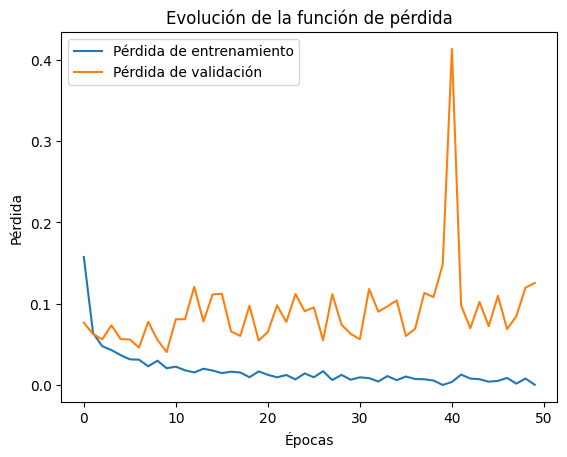

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3583 - loss: 1.2121

🔹 Loss: 1.2444  |  Accuracy: 0.3450


In [13]:
import matplotlib.pyplot as plt # Realizamos la gráfica

plt.plot(history.history['loss'], label='Pérdida de entrenamiento') # Graficando los datos
plt.plot(history.history['val_loss'], label='Pérdida de validación') # Graficando los datos de la 2da
plt.xlabel('Épocas') # En los ejes X
plt.ylabel('Pérdida') # En los ejes Y
plt.legend() # Identifica las diferentes líneas o elementos trazados en el gráfico
plt.title('Evolución de la función de pérdida') # Definimos el título
plt.show() # Muestra el gráfico

loss, acc = modelo.evaluate(X_test, y_test) # Utiliza el conjunto de datos de prueba (X_test, y_test) para calcular dos valores: la pérdida (error) y la precisión
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}") # Indica que tan grande es el error y muestra los resultados de ambos

Matriz de Confusión

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


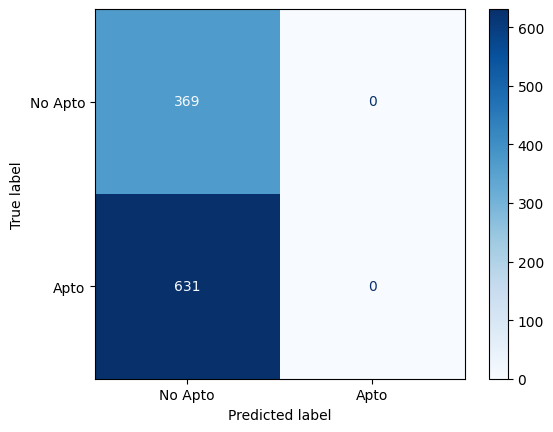


Sensitivity (Recall) por clase:
No Apto: 1.00
Apto: 0.00


In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


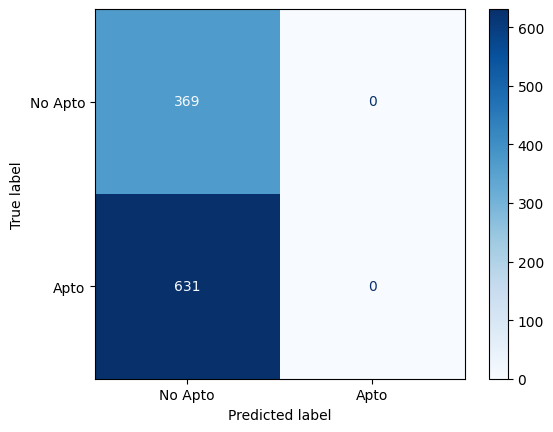


Sensitivity (Recall) por clase:
No Apto: 1.00
Apto: 0.00


In [20]:
# Importar métricas de Scikit-learn para evaluación
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
import numpy as np # Necesario para argmax
import matplotlib.pyplot as plt # Necesario para graficar

pred = modelo.predict(X_test) # Obtiene las probabilidades de predicción
y_pred = np.argmax(pred, axis=1) # Convierte probabilidades a etiquetas (clase con mayor probabilidad)
y_true = np.argmax(y_test, axis=1) # Convierte etiquetas reales (one-hot) a etiquetas de clase

cm = confusion_matrix(y_true, y_pred) # Calcula la matriz de confusión
disp = ConfusionMatrixDisplay( # Crea el objeto de visualización
    confusion_matrix=cm,
    display_labels=['No Apto', 'Apto']
)
disp.plot(cmap='Blues') # Grafica la matriz (usa el mapa de colores 'Blues')
plt.show() # Muestra el gráfico

sensitivity = recall_score(y_true, y_pred, average=None) # Calcula recall por clase (average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}") # Muestra el recall de la clase 0
print(f"Apto: {sensitivity[1]:.2f}") # Muestra el recall de la clase 1